#1. Deskripsi Dataset

Dataset ini berisi informasi nilai akademik dari 608 siswa SMPN 2 Wungu yang telah lulus antara tahun 2021 hingga 2023. Setiap baris dalam dataset merepresentasikan satu siswa, dengan kolom-kolom yang mencakup data identitas serta nilai akademik pada berbagai mata pelajaran selama enam semester (kelas 7 hingga kelas 9 SMP).

Data ini diperoleh dari buku induk siswa, yang merupakan arsip resmi sekolah mengenai pencapaian akademik tiap peserta didik.

Berikut adalah struktur kolom dalam dataset:

| No. | Kategori           | Nama Kolom                        | Jumlah Kolom |
|-----|--------------------|-----------------------------------|--------------|
| 1   | Identitas Siswa    | Nama, NIS, Absen, Ekstrakurikuler | 4            |
| 2   | Pendidikan Agama   | Agama1 - Agama6                   | 6            |
| 3   | PPKn               | PKN1 - PKN6                       | 6            |
| 4   | Bahasa Indonesia   | Indo1 - Indo6                     | 6            |
| 5   | Matematika         | Mate1 - Mate6                     | 6            |
| 6   | IPA                | IPA1 - IPA6                       | 6            |
| 7   | IPS                | IPS1 - IPS6                       | 6            |
| 8   | Bahasa Inggris     | Inggris1 - Inggris6               | 6            |
| 9   | Seni Budaya        | Senbud1 - Senbud6                 | 6            |
| 10  | PJOK               | PJOK1 - PJOK6                     | 6            |
| 11  | Prakarya           | Prakarya1 - Prakarya6             | 6            |
| 12  | Bahasa Daerah      | B_Daerah1 - B_Daerah6             | 6            |
|     | **Total**          |                                   | **70**       |


#2. Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import linregress

#3. Memuat Dataset

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRxbz3oIGpsWYx-0ZW5vXA2TMO2TxzZkgwYVZSeTJkHoXJBhXzyhbc6bQw47vuB8Asq5TRXlKUGVvkp/pub?output=csv'
df = pd.read_csv(url)

df.head()


,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82.0,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74.0,65.0,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82.0,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69.0,72.0,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77.0,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71.0,66.0,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81.0,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74.0,73.0,68.0,72.0,74.0,80.0
4,AJENG APRILIA,6164,5,Pramuka,80,90.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.0,67.0,NaN,NaN,NaN,NaN


#4. Exploratory Data Analysis

Missing Value & Duplicated Data

In [ ]:
df.isna().sum()

,0
Nama,0
NIS,0
Absen,0
Ekstrakurikuler,4
Agama1,0
...,...
B_Daerah2,4
B_Daerah3,4
B_Daerah4,4
B_Daerah5,4


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates()
df.head()

,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82.0,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74.0,65.0,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82.0,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69.0,72.0,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77.0,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71.0,66.0,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81.0,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74.0,73.0,68.0,72.0,74.0,80.0
4,AJENG APRILIA,6164,5,Pramuka,80,90.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.0,67.0,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()
df.head()

,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82.0,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74.0,65.0,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82.0,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69.0,72.0,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77.0,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71.0,66.0,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81.0,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74.0,73.0,68.0,72.0,74.0,80.0
5,ANDIKA YUWANDA,6165,6,"Pramuka, Keagamaan",76,72.0,70.0,77.0,73.0,81.0,...,70.0,73.0,71.0,71.0,67.0,66.0,67.0,71.0,71.0,73.0


Eksplorasi data distribusi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 606
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama             597 non-null    object 
 1   NIS              597 non-null    int64  
 2   Absen            597 non-null    int64  
 3   Ekstrakurikuler  597 non-null    object 
 4   Agama1           597 non-null    int64  
 5   Agama2           597 non-null    float64
 6   Agama3           597 non-null    float64
 7   Agama4           597 non-null    float64
 8   Agama5           597 non-null    float64
 9   Agama6           597 non-null    float64
 10  PKN1             597 non-null    int64  
 11  PKN2             597 non-null    float64
 12  PKN3             597 non-null    float64
 13  PKN4             597 non-null    float64
 14  PKN5             597 non-null    float64
 15  PKN6             597 non-null    float64
 16  Indo1            597 non-null    int64  
 17  Indo2            597 

In [ ]:
df.shape

(597, 70)

In [ ]:
df['NIS'].nunique()

595

In [ ]:
df['Absen'].describe()

,Absen
count,597.000000
mean,10.246231
std,10.675570
min,0.000000
25%,3.000000
50%,7.000000
75%,14.000000
max,71.000000


In [ ]:
df['Ekstrakurikuler'].value_counts()

,count
Ekstrakurikuler,
"Pramuka, Keagamaan",500
Pramuka,41
"Pramuka, PMR, Keagamaan",14
"Pramuka, Olah Raga, Keagamaan",14
"Pramuka, K. Ilmiah, Keagamaan",7
"Pramuka, PMR",6
"Pramuka, KEL. Ilmiah, Keagamaan",3
"Pramuka, BHS Asing, Keagamaan",2
Keagamaan,2


Corelation Matrix

<ipython-input-126-deb850a4b8dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{subject}_Mean'] = df[subject_cols].mean(axis=1)
<ipython-input-126-deb850a4b8dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{subject}_Mean'] = df[subject_cols].mean(axis=1)
<ipython-input-126-deb850a4b8dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

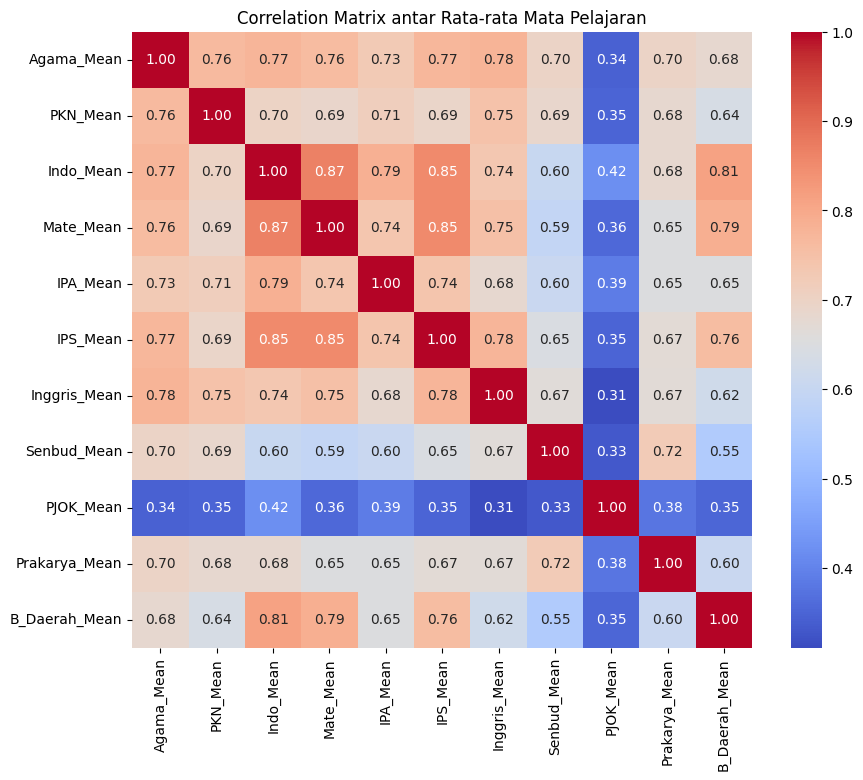

In [ ]:
subjects = ['Agama', 'PKN', 'Indo', 'Mate', 'IPA', 'IPS', 'Inggris', 'Senbud', 'PJOK', 'Prakarya', 'B_Daerah']

# Menghitung rata-rata setiap mata pelajaran
for subject in subjects:
    subject_cols = [col for col in df.columns if col.startswith(subject)]
    df[f'{subject}_Mean'] = df[subject_cols].mean(axis=1)

mean_cols = [f'{subject}_Mean' for subject in subjects]

correlation_matrix = df[mean_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix antar Rata-rata Mata Pelajaran')
plt.show()

Boxplot

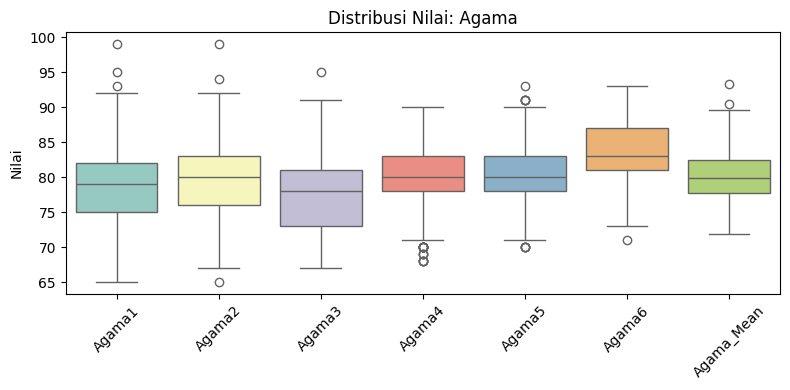

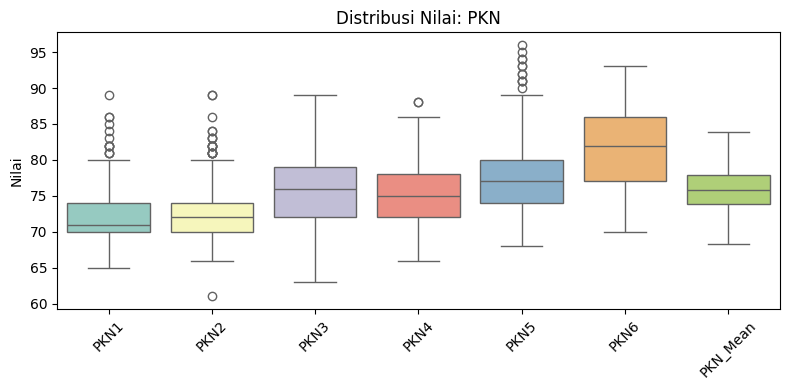

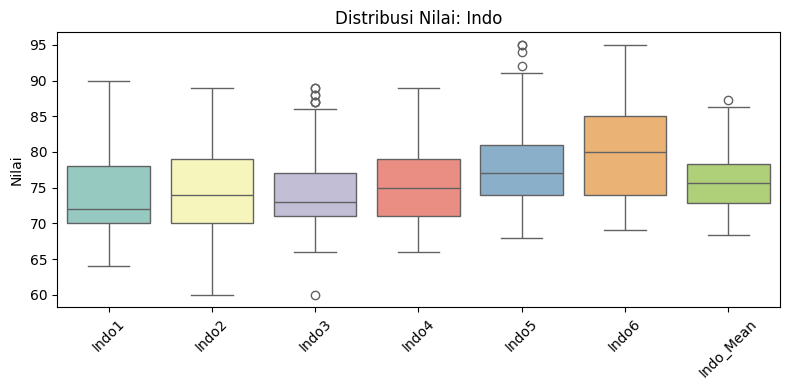

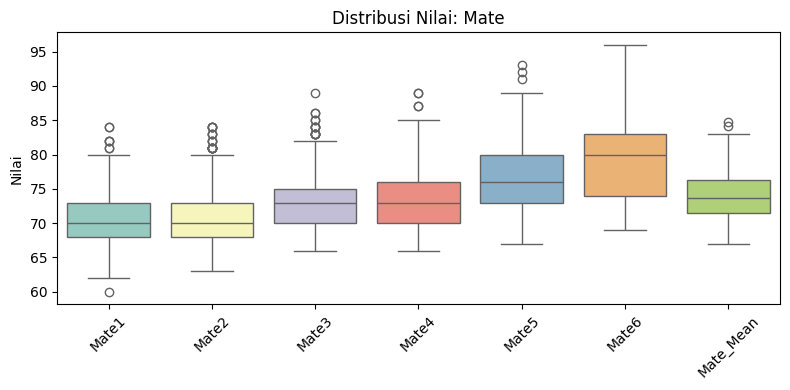

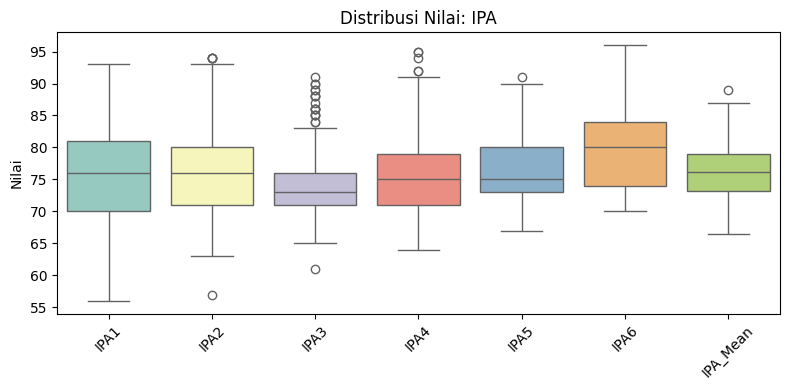

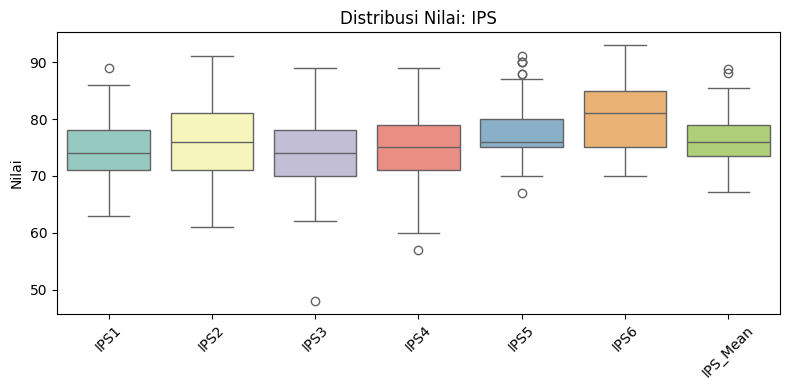

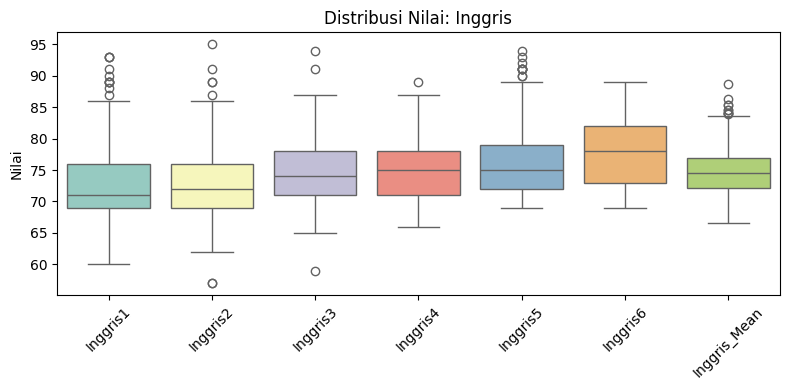

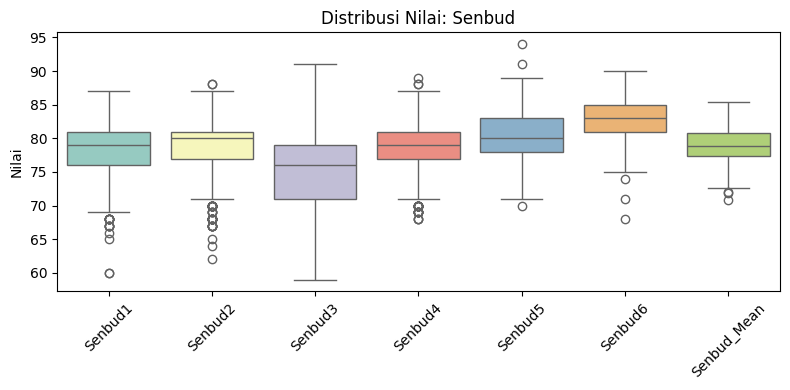

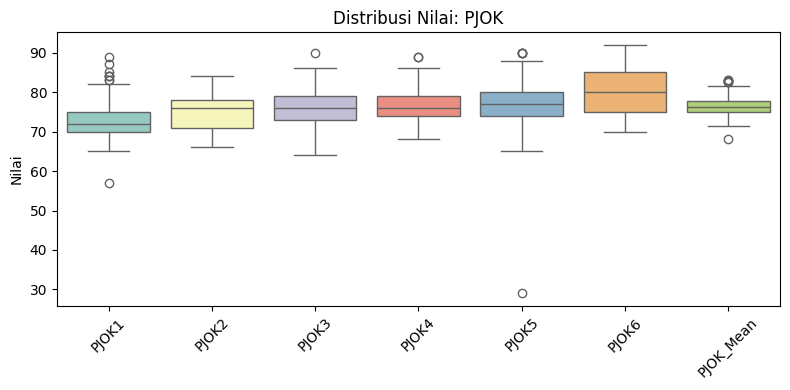

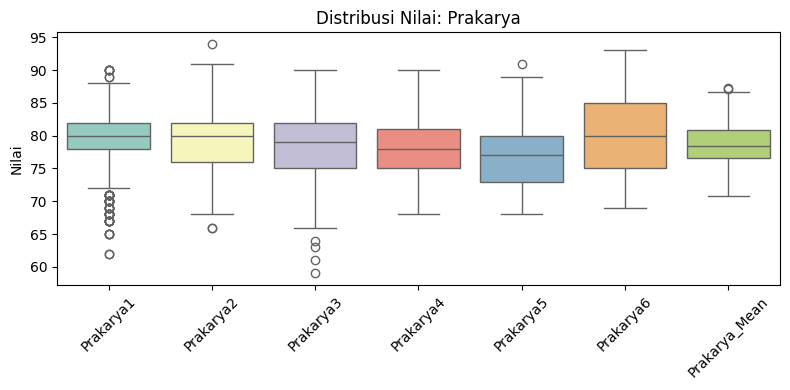

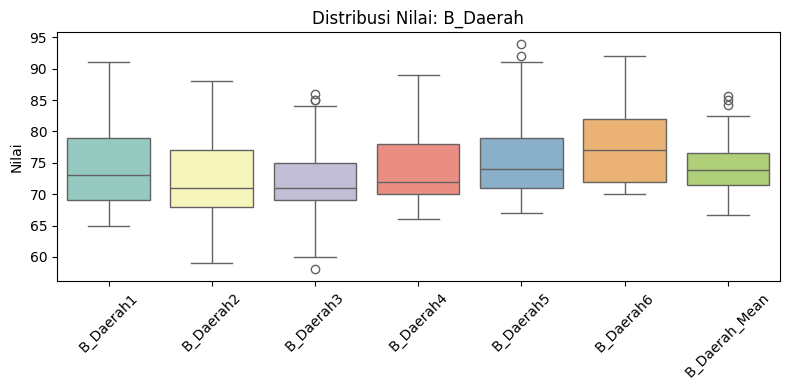

In [ ]:
for subject in subjects:
    cols = [col for col in df.columns if col.startswith(subject)]

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[cols], palette='Set3')
    plt.title(f'Distribusi Nilai: {subject}')
    plt.ylabel('Nilai')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Histogram

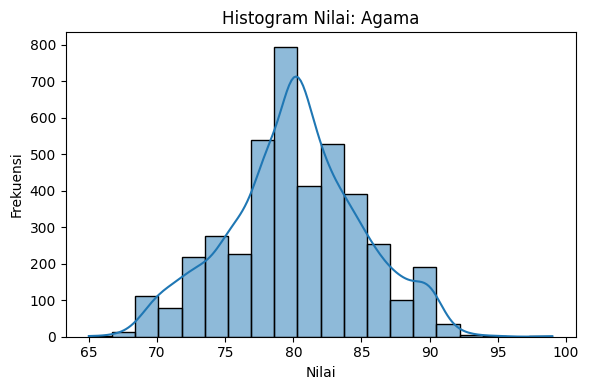

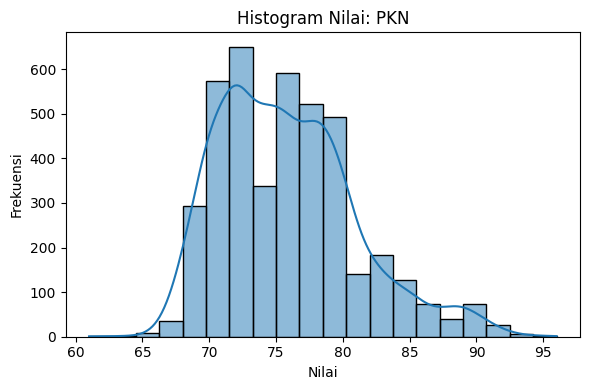

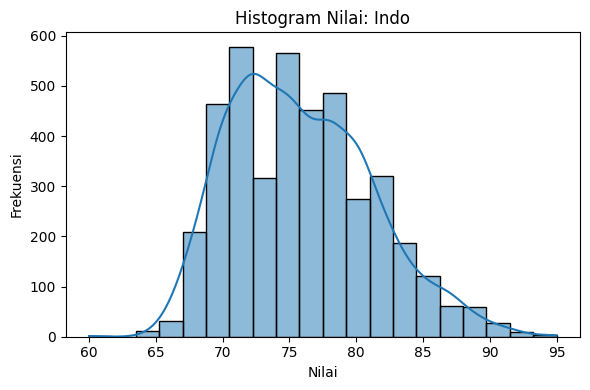

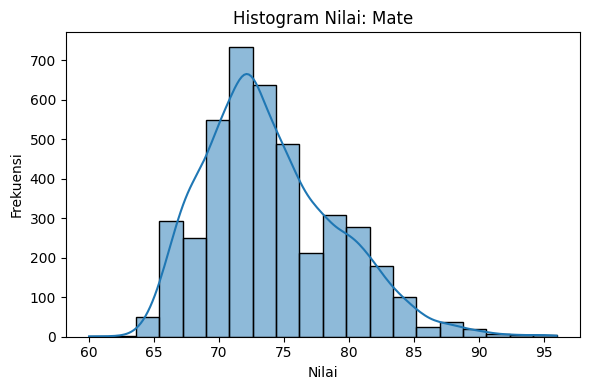

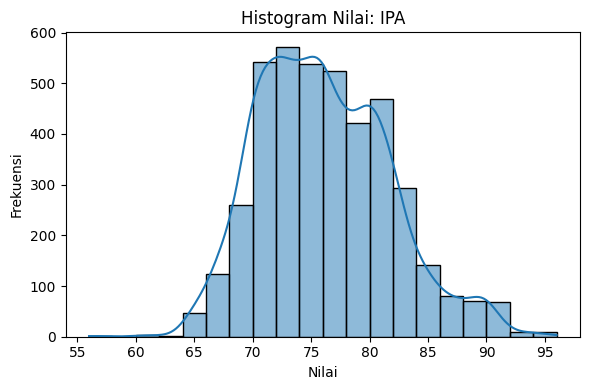

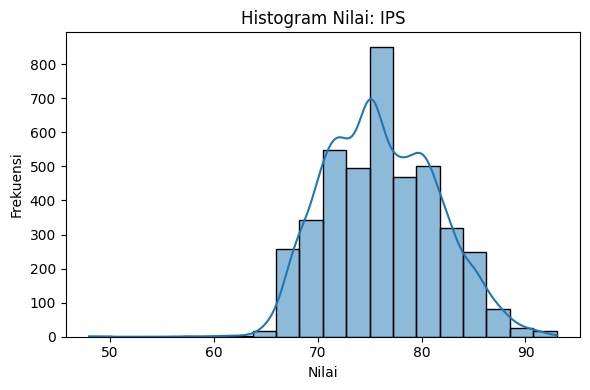

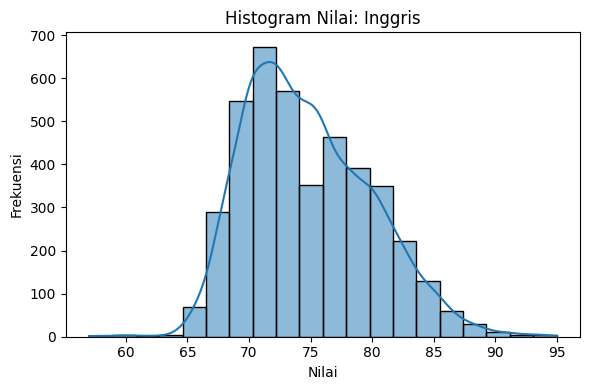

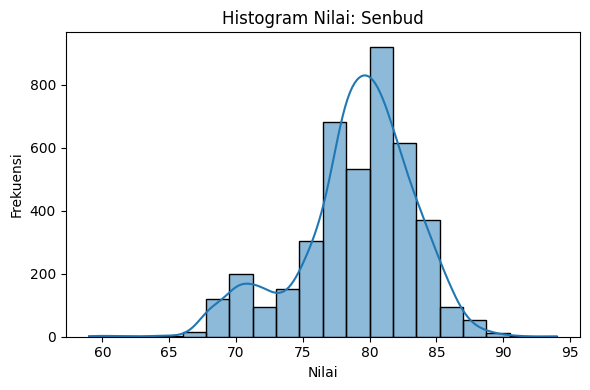

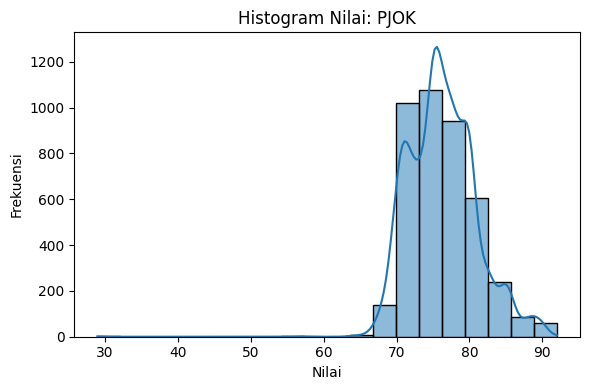

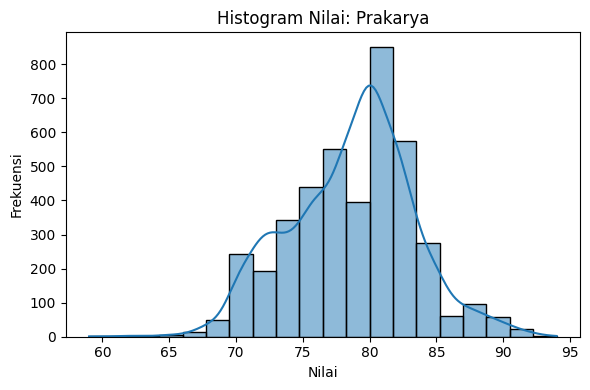

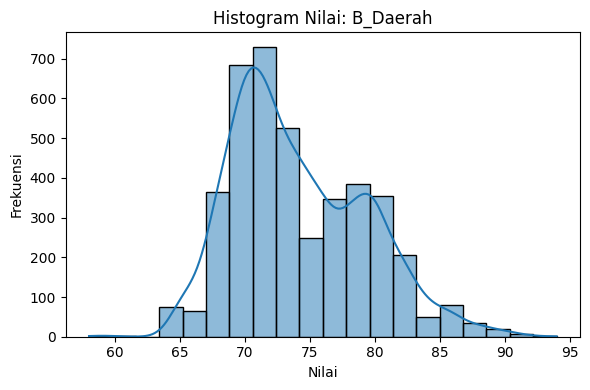

In [ ]:
for subject in subjects:
    cols = [col for col in df.columns if col.startswith(subject)]
    all_scores = df[cols].values.flatten()  # Gabungkan semua nilai di mata pelajaran tersebut

    plt.figure(figsize=(6, 4))
    sns.histplot(all_scores, bins=20, kde=True)
    plt.title(f'Histogram Nilai: {subject}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Menammpilkan tren nilai setiap pelajaran

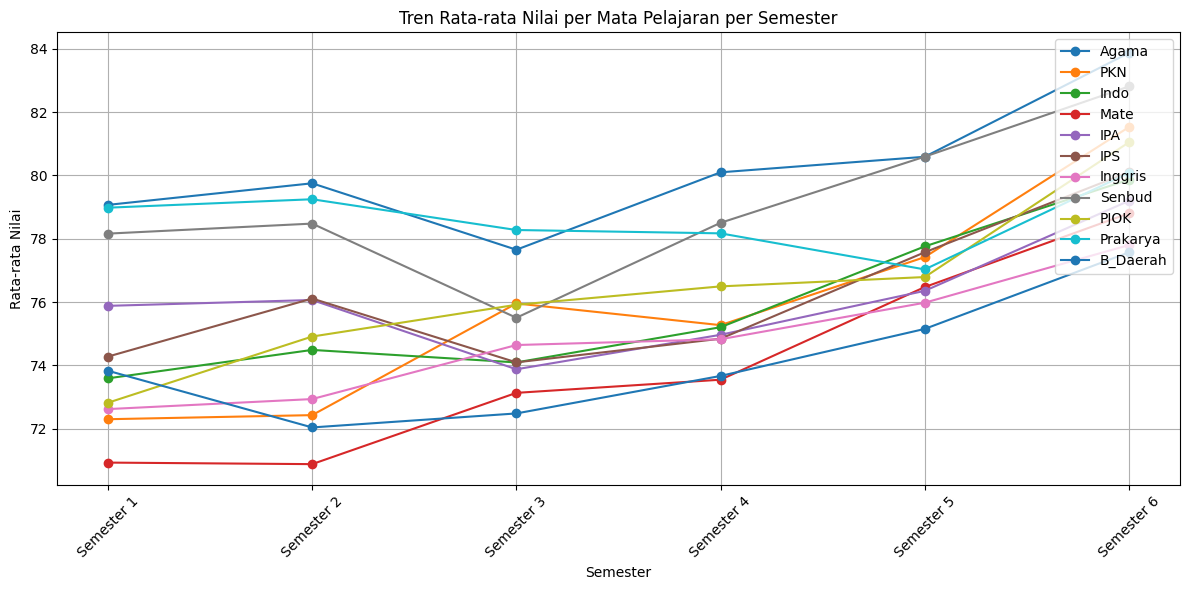

In [ ]:
subject_trends = {}

for subject in subjects:
    semester_means = []
    for i in range(1, 7):  # Semester 1 sampai 6
        col_name = f'{subject}{i}'
        if col_name in df.columns:
            semester_means.append(df[col_name].mean())
        else:
            semester_means.append(None)
    subject_trends[subject] = semester_means

# Ubah ke DataFrame
trend_df = pd.DataFrame(subject_trends, index=[f'Semester {i}' for i in range(1, 7)])

# Plot tren
plt.figure(figsize=(12, 6))
for subject in trend_df.columns:
    plt.plot(trend_df.index, trend_df[subject], marker='o', label=subject)

plt.title('Tren Rata-rata Nilai per Mata Pelajaran per Semester')
plt.xlabel('Semester')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Menentukan jurusan berdasakan rata-rata dan tren nilai siswa

In [ ]:
# Menghitung kemiringan grafik untuk menentukan naik atau turunnya nilai
def hitung_tren(nama_siswa, subject):
    semesters = np.array([1, 2, 3, 4, 5, 6])
    cols = [f'{subject}{i}' for i in semesters]

    # Mengambil nilai setiap siswa
    nilai = df.loc[nama_siswa, cols].values.astype(float)

    # Jika ada nilai NaN diisi dengan nilai nol
    if np.any(np.isnan(nilai)):
        return 0

    # Menghitung regresi linear
    slope, intercept, r_value, p_value, std_err = linregress(semesters, nilai)
    return slope

# diterapkan untuk setiap siswa dan setiap mata pelajaran
for subject in subjects:
    df[f'{subject}_Trend'] = df.index.map(lambda idx: hitung_tren(idx, subject))

In [ ]:
def tentukan_jurusan(row):
    # menghitung rata-rata dan tren untuk menentukan jurusan

    ipa_score = 0.7 * ((row['Mate_Mean'] + row['IPA_Mean']) / 2) + 0.3 * ((row['Mate_Trend'] + row['IPA_Trend']) / 2 * 10)
    ips_score = 0.7 * ((row['IPS_Mean'] + row['PKN_Mean']) / 2) + 0.3 * ((row['IPS_Trend'] + row['PKN_Trend']) / 2 * 10)
    bahasa_score = 0.7 * ((row['Indo_Mean'] + row['Inggris_Mean']) / 2) + 0.3 * ((row['Indo_Trend'] + row['Inggris_Trend']) / 2 * 10)

    scores = {'IPA': ipa_score, 'IPS': ips_score, 'BAHASA': bahasa_score}
    return max(scores, key=scores.get)

# Labeling
df['Jurusan'] = df.apply(tentukan_jurusan, axis=1)

In [ ]:
df['Jurusan'].value_counts()

,count
Jurusan,
IPS,342
IPA,139
BAHASA,116


#5. Data Preparation

In [ ]:
# Hilangkan kolom yang tidak diperlukan
df = df.drop(columns=["Nama", "NIS", "Ekstrakurikuler", "Absen"])

# Scalling data menggunakan MinMaxScaler
kolom_nilai = [
    'Agama1', 'Agama2', 'Agama3', 'Agama4', 'Agama5', 'Agama6',
    'PKN1', 'PKN2', 'PKN3', 'PKN4', 'PKN5', 'PKN6',
    'Indo1', 'Indo2', 'Indo3', 'Indo4', 'Indo5', 'Indo6',
    'Mate1', 'Mate2', 'Mate3', 'Mate4', 'Mate5', 'Mate6',
    'IPA1', 'IPA2', 'IPA3', 'IPA4', 'IPA5', 'IPA6',
    'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6',
    'Inggris1', 'Inggris2', 'Inggris3', 'Inggris4', 'Inggris5', 'Inggris6',
    'Senbud1', 'Senbud2', 'Senbud3', 'Senbud4', 'Senbud5', 'Senbud6',
    'PJOK1', 'PJOK2', 'PJOK3', 'PJOK4', 'PJOK5', 'PJOK6',
    'Prakarya1', 'Prakarya2', 'Prakarya3', 'Prakarya4', 'Prakarya5', 'Prakarya6',
    'B_Daerah1', 'B_Daerah2', 'B_Daerah3', 'B_Daerah4', 'B_Daerah5', 'B_Daerah6'
]

scaler = MinMaxScaler()
kolom_nilai_valid = [kol for kol in kolom_nilai if kol in df.columns]
df[kolom_nilai_valid] = scaler.fit_transform(df[kolom_nilai_valid])
print(df[kolom_nilai_valid].head())

     Agama1    Agama2    Agama3    Agama4    Agama5    Agama6      PKN1  \
0  0.323529  0.500000  0.178571  0.454545  0.086957  0.454545  0.458333   
1  0.382353  0.500000  0.464286  0.545455  0.173913  0.454545  0.375000   
2  0.323529  0.352941  0.107143  0.454545  0.086957  0.409091  0.333333   
3  0.441176  0.470588  0.285714  0.454545  0.565217  0.590909  0.291667   
5  0.323529  0.205882  0.107143  0.409091  0.130435  0.454545  0.291667   

       PKN2      PKN3      PKN4  ...  Prakarya3  Prakarya4  Prakarya5  \
0  0.785714  0.307692  0.363636  ...   0.548387   0.409091   0.217391   
1  0.642857  0.346154  0.500000  ...   0.483871   0.363636   0.086957   
2  0.571429  0.500000  0.227273  ...   0.612903   0.454545   0.130435   
3  0.500000  0.615385  0.363636  ...   0.677419   0.590909   0.391304   
5  0.464286  0.346154  0.181818  ...   0.354839   0.227273   0.130435   

   Prakarya6  B_Daerah1  B_Daerah2  B_Daerah3  B_Daerah4  B_Daerah5  B_Daerah6  
0   0.291667   0.346154   0.2

#6. Modelling

## A. Random Forest

#7. Evaluasi